In [34]:

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

from sklearn.datasets import load_iris

iris = load_iris()

# Load the X (features) and y (targets) for training
X_train = iris['data']
y_train = iris['target']

print(type(X_train))

# Load the name labels for features and targets
feature_names = iris['feature_names']
names = iris['target_names']

# Print the first 10 training samples for both features and targets
print(X_train[:10, :], y_train[:10])

# Print the dimensions of features and targets
print(X_train.shape, y_train.shape)

# Print the dimensions of features and targets
print(X_train.shape, y_train.shape)

# feature_names contains name for each column in X_train
# For targets, 0 -> setosa, 1 -> versicolor, 2 -> virginica
print(feature_names, names)


<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0]
(150, 4) (150,)
(150, 4) (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


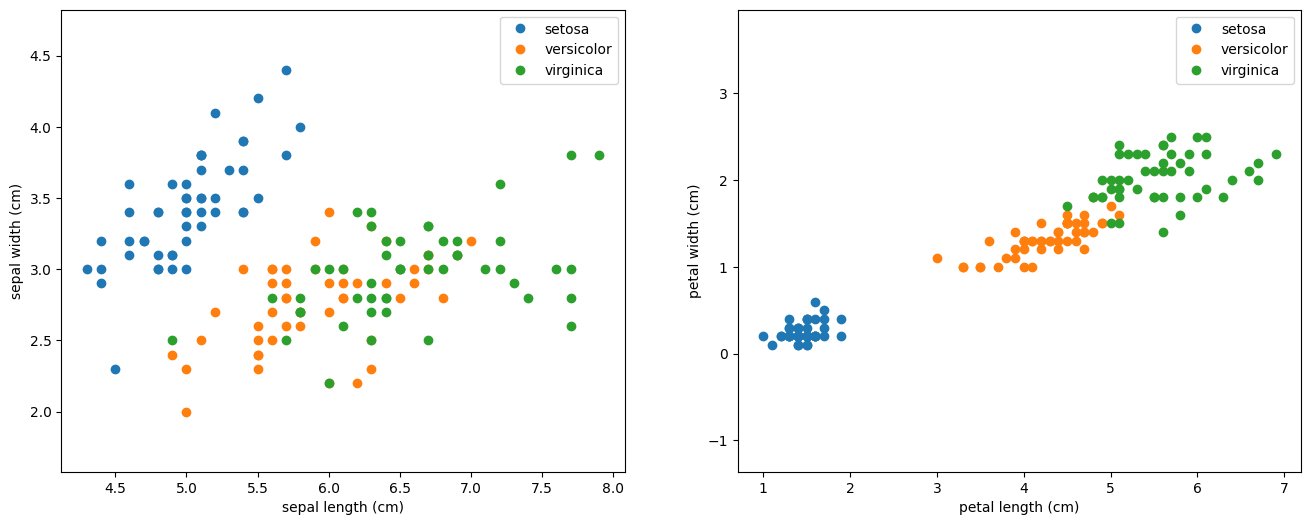

In [35]:

# We can visualize the dataset before training
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# enumerate picks up both the index (0, 1, 2) and the element ('setosa', 'versicolor', 'virginica') from "names"
# loop 1: target = 0, target_name = 'setosa'
# loop 2: target = 1, target_name = 'versicolor' etc
for target, target_name in enumerate(names):

    # Subset the rows of X_train that fall into each flower category using boolean mapping
    X_plot = X_train[y_train == target]

    # Plot the sepal length versus sepal width for the flower category
    ax1.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)

# Label the plot
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend()

# Repeat the above process but with petal length versus petal width
for target, target_name in enumerate(names):

    X_plot = X_train[y_train == target]

    ax2.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)

ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()



In [36]:

class irisClassification(torch.nn.Module):

    def __init__(self, input_dim, output_dim):

        super(irisClassification, self).__init__()

        self.layer1 = torch.nn.Linear(input_dim, 64)
        self.layer2 = torch.nn.Linear(64, output_dim)

        self.relu = torch.nn.ReLU()

    def forward(self, x):
        out = self.relu(self.layer1(x))
        out = self.relu(self.layer2(out))
        return out


In [37]:

#4 features -> 3 labels
model = irisClassification(4,1)

learning_rate = 0.01
epochs  = 30

# We will use gradient descent for our optimizer and Mean Squared Error Loss function
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


In [38]:

#keep track of loss over times
loss_over_time = []

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

print(X_train.shape)
print(y_train.shape)
print(y_train[0:80])


torch.Size([150, 4])
torch.Size([150])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.])


In [39]:

for epoch in range(epochs):

  optimizer.zero_grad()
  outputs = model.forward(X_train)
  loss = loss_func(outputs, y_train)
  loss_over_time.append(loss.item())
  print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

  loss.backward()
  optimizer.step()



Epoch: 0, Loss: 1.010109305381775
Epoch: 1, Loss: 1.6666666269302368
Epoch: 2, Loss: 1.6666666269302368
Epoch: 3, Loss: 1.6666666269302368
Epoch: 4, Loss: 1.6666666269302368
Epoch: 5, Loss: 1.6666666269302368
Epoch: 6, Loss: 1.6666666269302368
Epoch: 7, Loss: 1.6666666269302368
Epoch: 8, Loss: 1.6666666269302368
Epoch: 9, Loss: 1.6666666269302368
Epoch: 10, Loss: 1.6666666269302368
Epoch: 11, Loss: 1.6666666269302368
Epoch: 12, Loss: 1.6666666269302368
Epoch: 13, Loss: 1.6666666269302368
Epoch: 14, Loss: 1.6666666269302368
Epoch: 15, Loss: 1.6666666269302368
Epoch: 16, Loss: 1.6666666269302368
Epoch: 17, Loss: 1.6666666269302368
Epoch: 18, Loss: 1.6666666269302368
Epoch: 19, Loss: 1.6666666269302368
Epoch: 20, Loss: 1.6666666269302368
Epoch: 21, Loss: 1.6666666269302368
Epoch: 22, Loss: 1.6666666269302368
Epoch: 23, Loss: 1.6666666269302368
Epoch: 24, Loss: 1.6666666269302368
Epoch: 25, Loss: 1.6666666269302368
Epoch: 26, Loss: 1.6666666269302368
Epoch: 27, Loss: 1.6666666269302368
Epo

Text(0, 0.5, 'Loss')

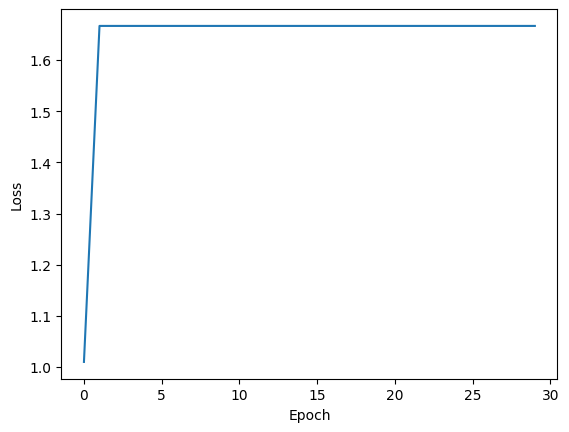

In [40]:

plt.plot(range(epochs), loss_over_time)
plt.xlabel("Epoch")
plt.ylabel("Loss")
